## Data used for understanding recycling better - Visualistaion

In [ ]:
# install all libraries
#!python -m pip install --upgrade pip
#!pip install xlrd

In [61]:
# import all libraries
import pandas as pd
from pandas import read_csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
current_dir = os.getcwd()
current_dir

'/Users/arminberger/Desktop/Semester 1. 2022/FIT5120-Industry Experience/onboarding project/wrangling_code'

Read in the data to be visualised

In [4]:
trash_allowed_df = pd.read_csv(current_dir + '/open_data/final_vis_data/trash_allowed.csv')

In [5]:
trash_unallowed_df = pd.read_csv(current_dir + '/open_data/final_vis_data/trash_unallowed.csv')

In [6]:
trash_statistics_df = pd.read_csv(current_dir + '/open_data/final_vis_data/trash_statistics.csv')

In [7]:
trash_info_df = pd.read_csv(current_dir + '/open_data/final_vis_data/trash_info.csv')

In [9]:
trash_statistics_df.head()

,trash_name,year,weight_tonnes,contamination_rate,diversion_rate,cost_per_tonne
0,garbage,2001,1107893,0.0,0.0,88
1,garbage,2002,1057043,0.0,0.0,95
2,garbage,2003,1062188,0.0,0.0,105
3,garbage,2004,1023705,0.0,0.0,113
4,garbage,2005,1023244,0.0,0.0,122


In [14]:
trash_statistics_df[trash_statistics_df['trash_name'] == 'garbage']['weight_tonnes']

0     1107893
1     1057043
2     1062188
3     1023705
4     1023244
5      999679
6     1013037
7     1024661
8     1056517
9     1089158
10    1111309
11    1102150
12    1130983
13    1158735
14    1160317
15    1176701
16    1180731
17    1180705
18    1222837
Name: weight_tonnes, dtype: int64

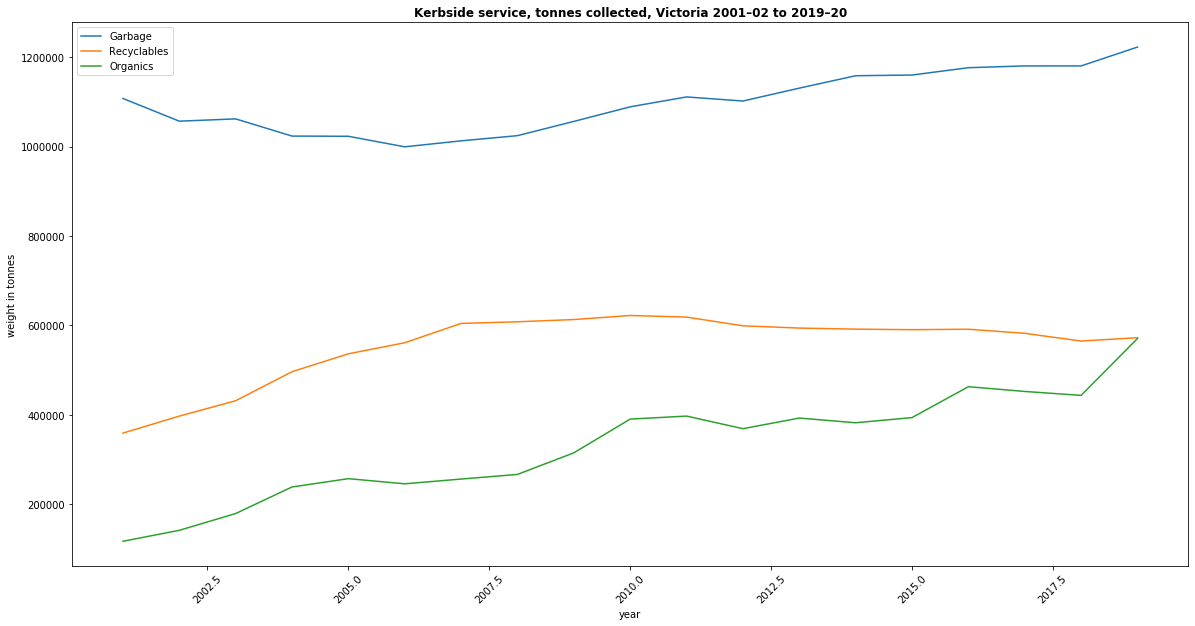

In [51]:
# plot figure year for feature Reporting_Date
plt.figure(figsize=(20,10))
plt.plot(trash_statistics_df[trash_statistics_df['trash_name'] == 'garbage']['year'], \
         trash_statistics_df[trash_statistics_df['trash_name'] == 'garbage']['weight_tonnes'], label='Garbage')
plt.plot(trash_statistics_df[trash_statistics_df['trash_name'] == 'recyclables']['year'], \
         trash_statistics_df[trash_statistics_df['trash_name'] == 'recyclables']['weight_tonnes'], label='Recyclables')
plt.plot(trash_statistics_df[trash_statistics_df['trash_name'] == 'organics']['year'], \
         trash_statistics_df[trash_statistics_df['trash_name'] == 'organics']['weight_tonnes'], label='Organics')
plt.title('Kerbside service, tonnes collected, Victoria 2001–02 to 2019–20', fontweight="bold")
plt.xlabel('year')
plt.ylabel('weight in tonnes')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('tonnes_collected.png')
plt.show()

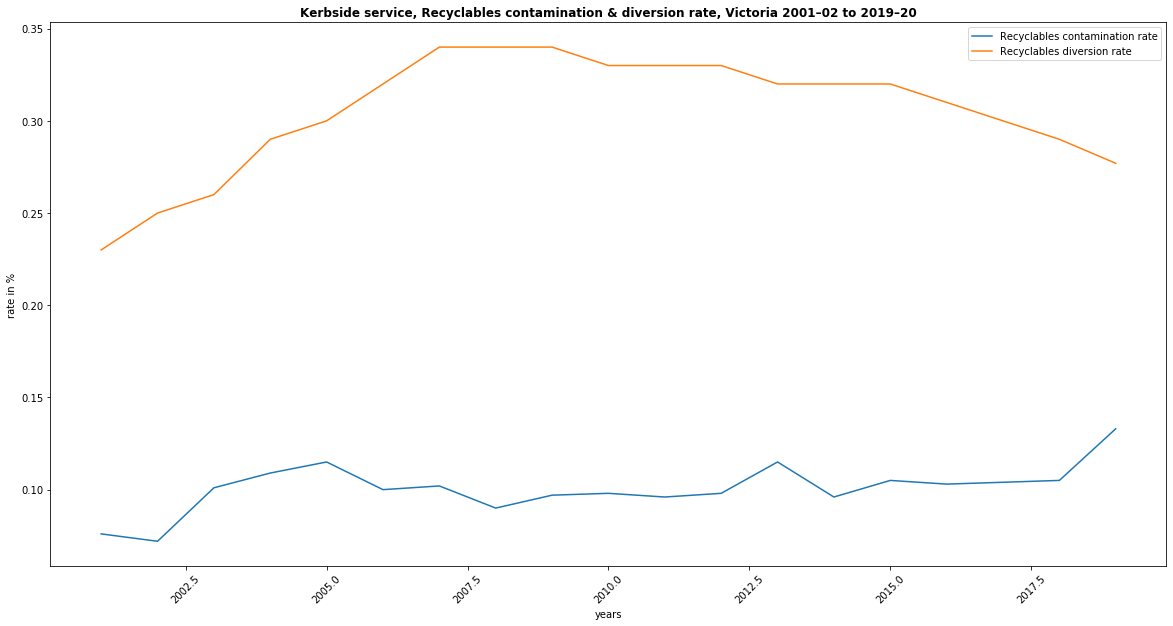

In [52]:
# plot figure year for feature Reporting_Date
plt.figure(figsize=(20,10))

plt.plot(trash_statistics_df[trash_statistics_df['trash_name'] == 'recyclables']['year'], \
         trash_statistics_df[trash_statistics_df['trash_name'] == 'recyclables']['contamination_rate'], label='Recyclables contamination rate')
plt.plot(trash_statistics_df[trash_statistics_df['trash_name'] == 'recyclables']['year'], \
         trash_statistics_df[trash_statistics_df['trash_name'] == 'recyclables']['diversion_rate'], label='Recyclables diversion rate')
plt.title('Kerbside service, Recyclables contamination & diversion rate, Victoria 2001–02 to 2019–20', fontweight="bold")
plt.xlabel('years')
plt.ylabel('rate in %')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('contamination_diversion_rate.png')
plt.show()

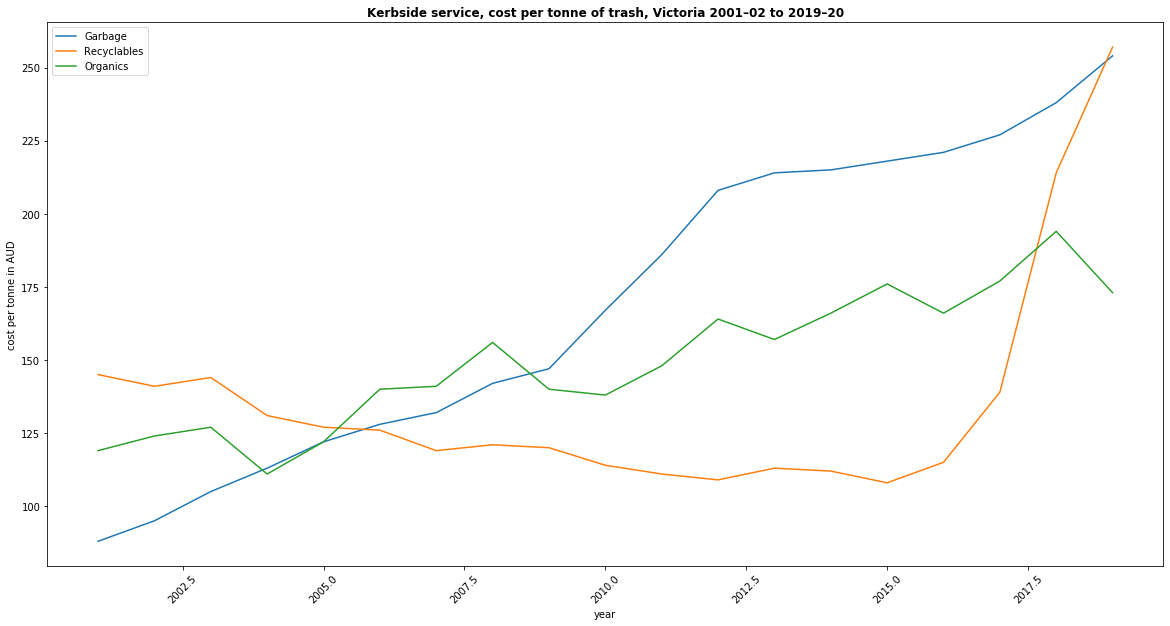

In [53]:
# plot figure year for feature Reporting_Date
plt.figure(figsize=(20,10))
plt.plot(trash_statistics_df[trash_statistics_df['trash_name'] == 'garbage']['year'], \
         trash_statistics_df[trash_statistics_df['trash_name'] == 'garbage']['cost_per_tonne'], label='Garbage')

plt.plot(trash_statistics_df[trash_statistics_df['trash_name'] == 'recyclables']['year'], \
         trash_statistics_df[trash_statistics_df['trash_name'] == 'recyclables']['cost_per_tonne'], label='Recyclables')

plt.plot(trash_statistics_df[trash_statistics_df['trash_name'] == 'organics']['year'], \
         trash_statistics_df[trash_statistics_df['trash_name'] == 'organics']['cost_per_tonne'], label='Organics')
plt.title('Kerbside service, cost per tonne of trash, Victoria 2001–02 to 2019–20', fontweight="bold")
plt.xlabel('year')
plt.ylabel('cost per tonne in AUD')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('cost_per_tonne.png')
plt.show()

In [29]:
recycling_content_percent_df = pd.read_excel(current_dir + '/open_data/recycling_data_extracted.xlsx' \
                                 , sheet_name = 'recycling_content_percent', header = 1)

In [31]:
recycling_content_percent_df[recycling_content_percent_df['sub_group'] == 'All']

,group,sub_group,Composition (%)
0,Glass,All,0.274
3,Metal containers,All,0.027
8,Paper,All,0.471
13,Plastic,All,0.095
14,Contaminants,All,0.133


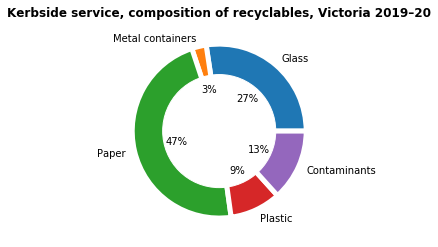

In [49]:
# create data
names = recycling_content_percent_df[recycling_content_percent_df['sub_group'] == 'All']['group']
size = recycling_content_percent_df[recycling_content_percent_df['sub_group'] == 'All']['Composition (%)']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.65, color='white')

# Custom wedges
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, autopct='%1.0f%%', pctdistance= 0.5, labeldistance=1.1)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Kerbside service, composition of recyclables, Victoria 2019–20',fontweight="bold")
plt.savefig('composition_of_recyclables.png')
plt.show()

In [64]:
trash_statistics_df[['weight_tonnes','cost_per_tonne']].head()

,weight_tonnes,cost_per_tonne
0,1107893,88
1,1057043,95
2,1062188,105
3,1023705,113
4,1023244,122


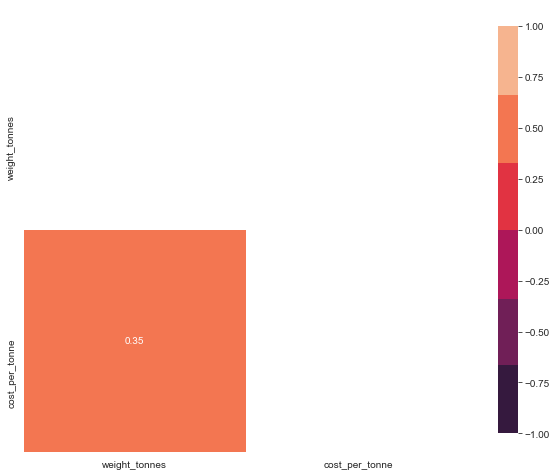

In [63]:

# create a whitegrid for our heatmap
sns.set_style('whitegrid')

# compute correlation matrix
corr_matrix = trash_statistics_df[['weight_tonnes','cost_per_tonne']].corr(method='pearson')

# first define the dimension
plt.figure(figsize=(10,15))

# generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# generate a custom diverging colormap
cmap = sns.color_palette("rocket")

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask = mask, cmap = cmap, center = 0, vmax = 1, vmin = -1, annot = True,
            square = True, linewidths = .5, cbar_kws={"shrink": .5})